# Máxima Verosimilitud Estimación de Parámetros Modelo Lineal

## Método Máxima Verosimilitud

In [ ]:
install.packages('latex2exp')
library(latex2exp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
mu = 5
sigma = 1
x <- rnorm(30, mu, sigma)

In [ ]:
log_funtion = function(x, mu_eval){
  return(log(dnorm(x, mean=mu_eval, sd= sigma)))
}

model_funtion = function(x, mu_eval){
  return(dnorm(x, mean=mu_eval, sd= sigma))
}

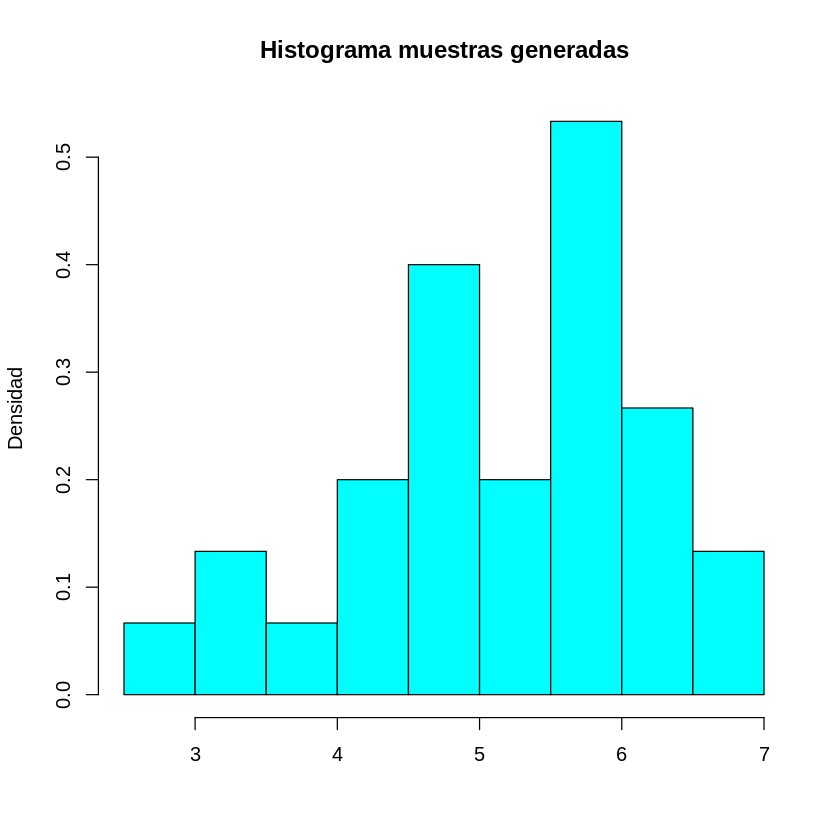

In [ ]:
hist(x, col="cyan",main="Histograma muestras generadas",xlab="",ylab="Densidad", freq = FALSE)

In [ ]:
likehood_samples <- c()
log_likehood_samples <- c()
mu_eval = seq(-1, 8, 0.01)
for (theta in mu_eval){
likehood <- 1
for (i in x){ likehood <- model_funtion(i,theta)*likehood }
log_likehood <- log(likehood)
likehood_samples <- c(likehood_samples, likehood)
log_likehood_samples <- c(log_likehood_samples, log_likehood)
}

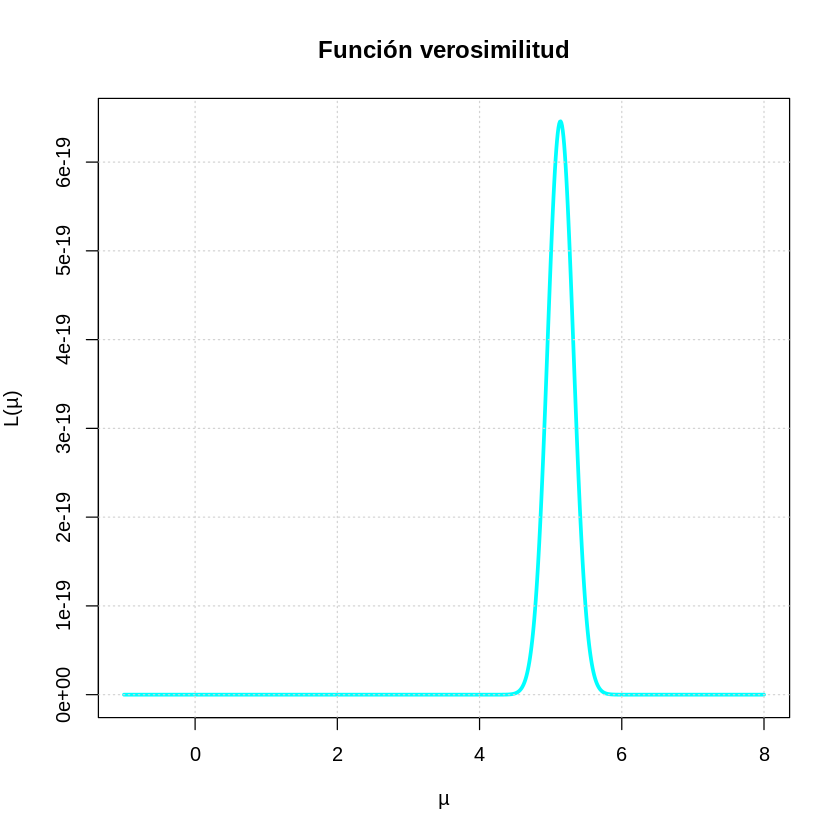

In [ ]:
plot(mu_eval, likehood_samples, main= "Función verosimilitud", 
      type="l", col="cyan", lwd= 3, ylab=TeX("$L(\\mu)$"), xlab=TeX("$\\mu$"))
grid()

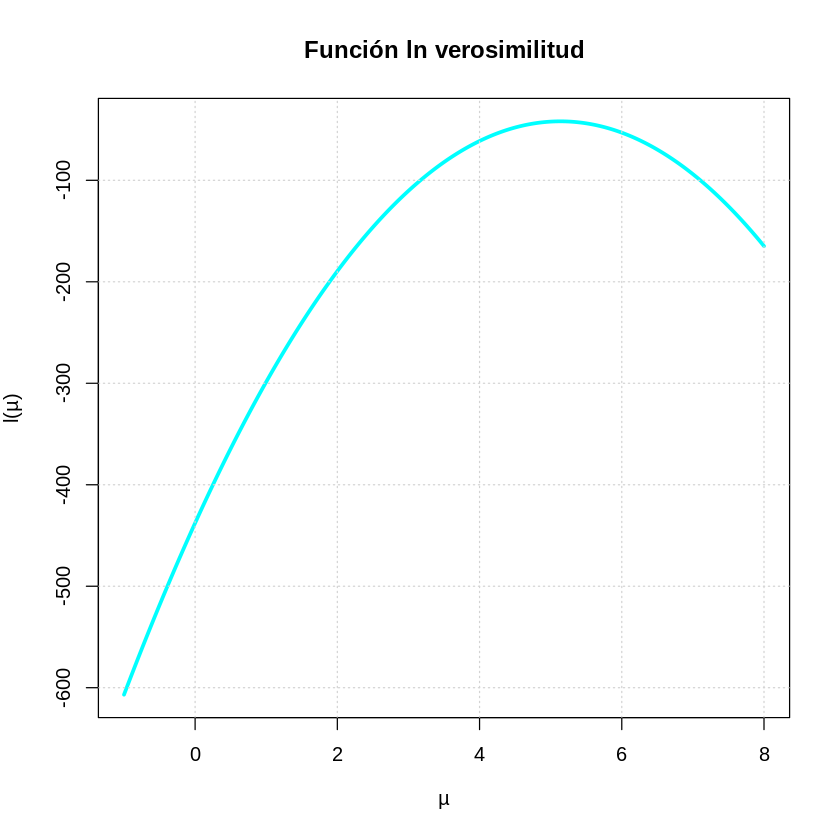

In [ ]:
plot(mu_eval, log_likehood_samples, main= "Función ln verosimilitud",
      type="l", col="cyan", lwd= 3, ylab=TeX("$l(\\mu)$"), xlab=TeX("$\\mu$"))
grid()

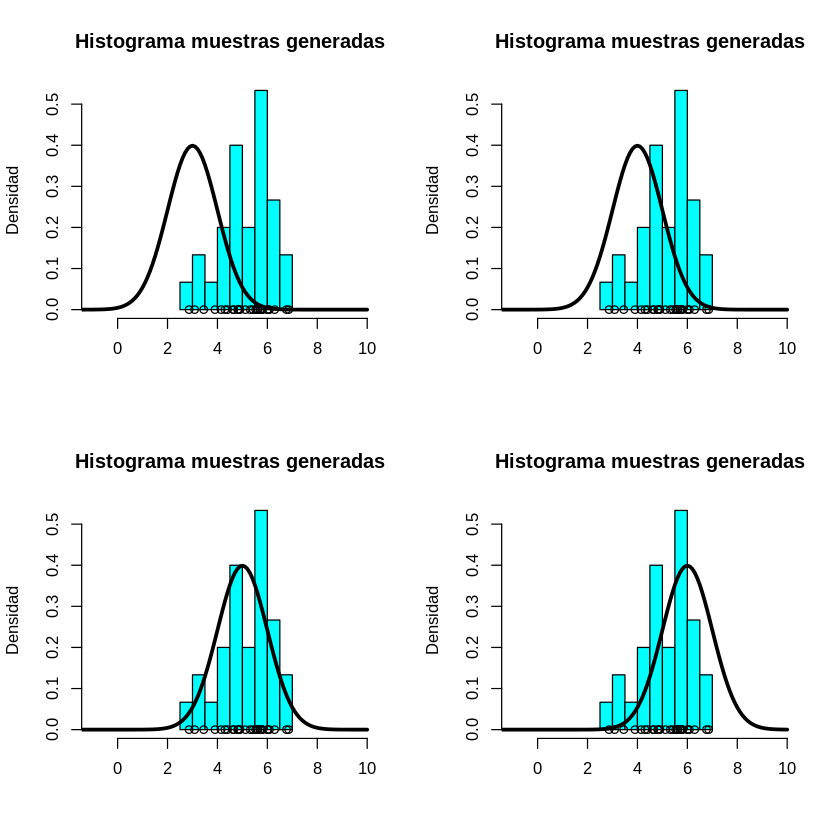

In [ ]:
xx <- seq(-10, 10, 0.1)
par(mfrow=c(2, 2))
for (theta in seq(3,6,1)){
  y <- dnorm(xx, mean=theta, sd= sigma) 
  hist(x,freq=FALSE, col="cyan", main="Histograma muestras generadas",xlab="",ylab="Densidad", xlim=c(-1, 10))
  lines(xx,y,lw=3)
  points(x,rep(0, length(x)))
}


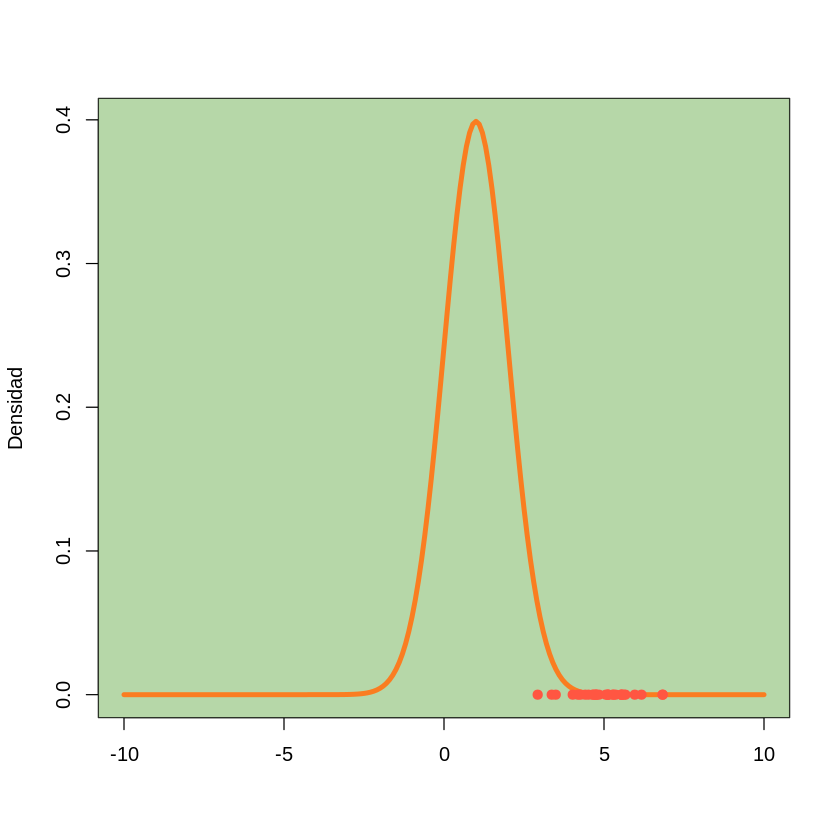

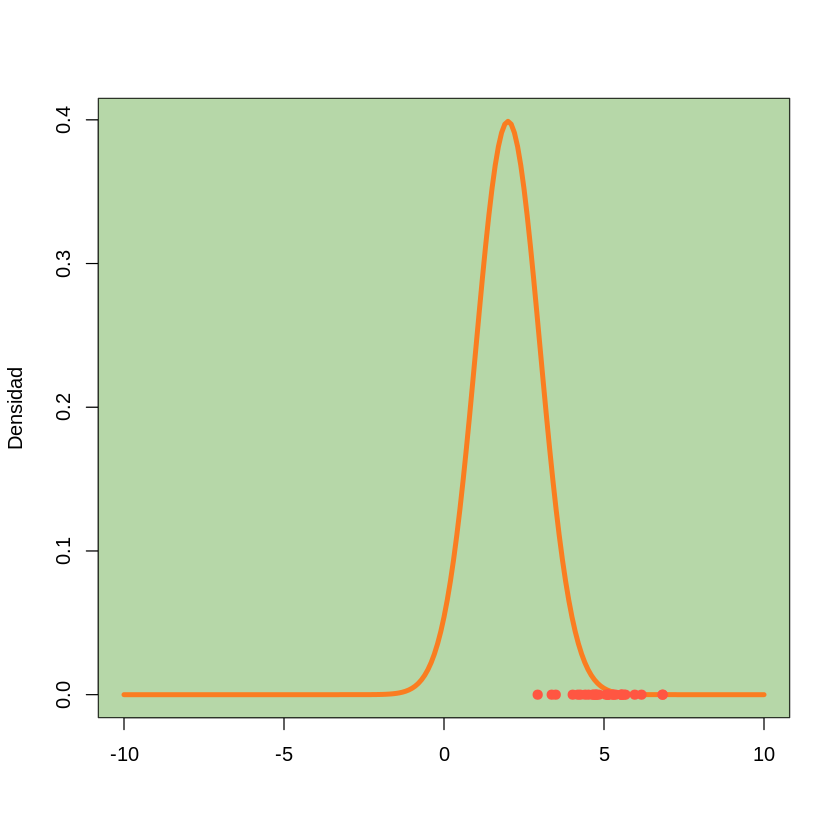

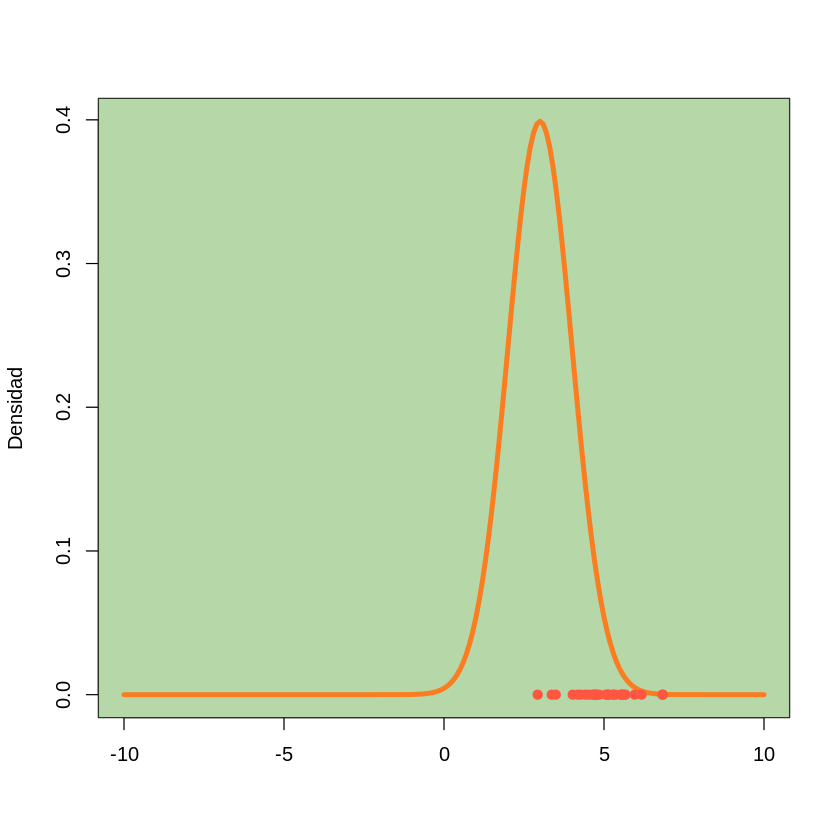

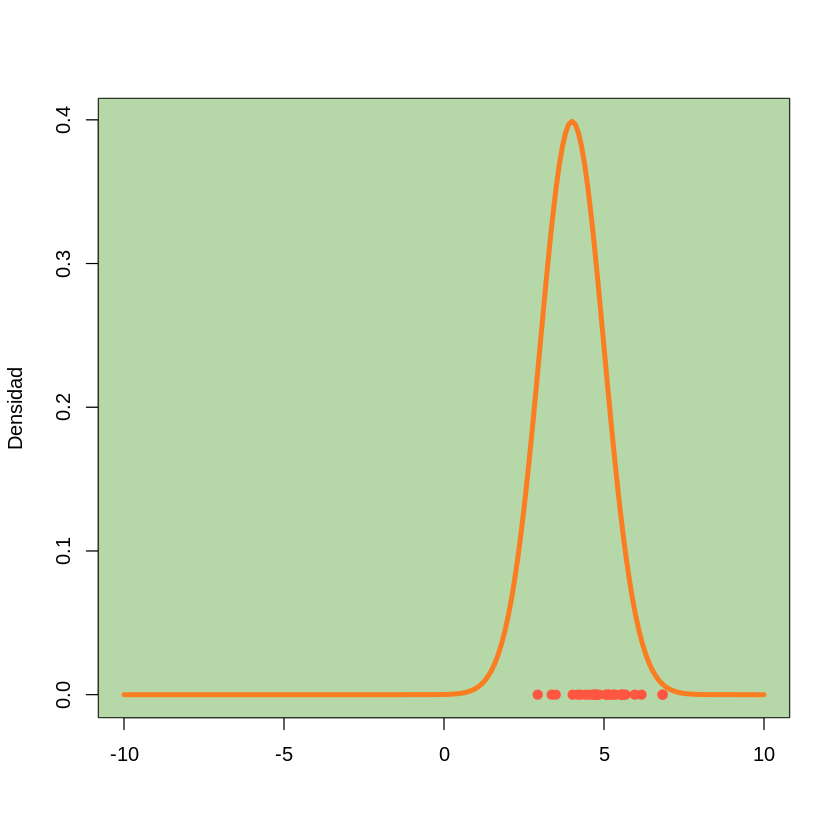

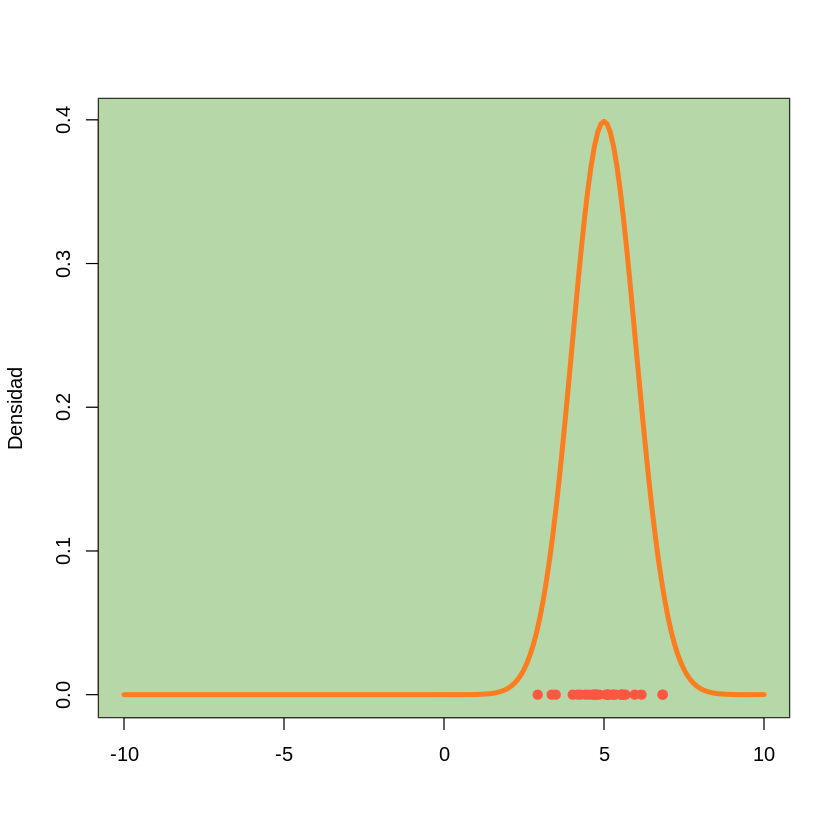

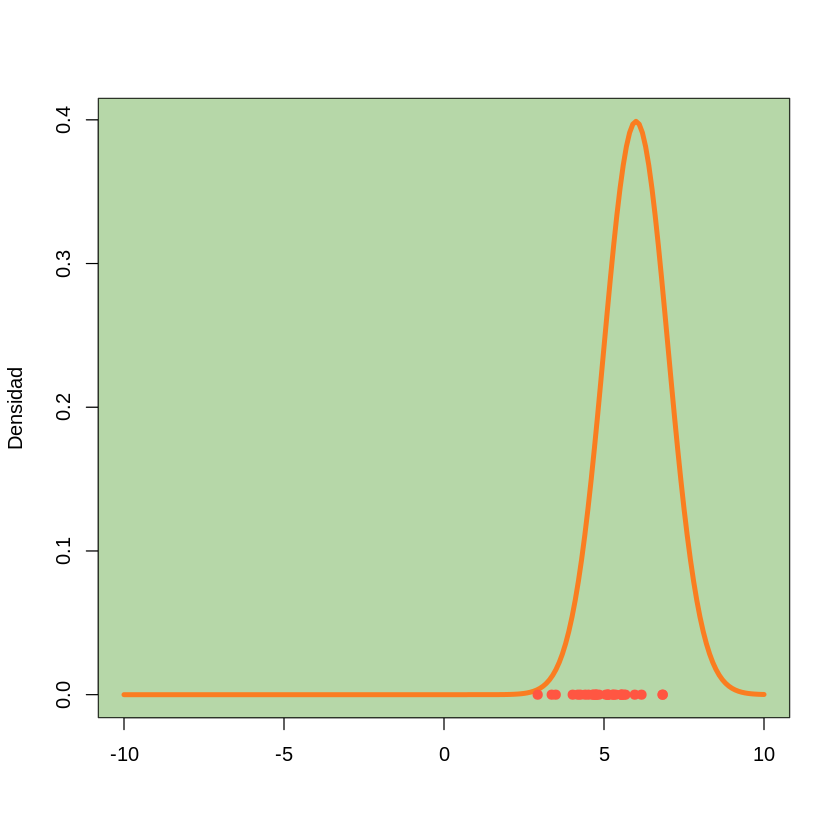

In [ ]:
xx <- seq(-10, 10, 0.1)
#par(mfrow=c(2, 2))
for (theta in seq(1,6,1)){
  y <- dnorm(xx, mean=theta, sd= sigma) 
  #hist(x,freq=FALSE, col="cyan", main="Histograma muestras generadas",xlab="",ylab="Densidad", xlim=c(-1, 10))
  plot(xx,y,type = "l", lwd = 4, col="black", ylab = "Densidad", xlab="")
  u <- par("usr")
  rect(u[1], u[3], u[2], u[4], col = "#b6d7a8")
  lines(xx,y,type = "l", lw = 4, col="#FA7D21", ylab = "Densidad", xlab="")
  points(x,rep(0, length(x)), col="#FF5642", pch=19)
  
}

## Implementación MMV

In [ ]:
ll <- function(param) {
  media <- param[1]
  sum(dnorm(x=x, mean=media, sd=sigma, log=TRUE))
}

In [ ]:
minusll <- function(x) -ll(x)
optimize(f=minusll, interval=c(-2, 10))

$minimum
[1] 5.137106

$objective
[1] 41.88349

In [ ]:
ll <- function(param) {
  media <- param[1]  
  desvi <- param[2] 
  sum(dnorm(x=x, mean=media, sd=desvi, log=TRUE))
}

In [ ]:
minusll <- function(x) -ll(x)
nlminb(objective=minusll, start=c(1, 2),
       lower=c(-10, 0), upper=c(10, 2))

$par
[1] 5.1371060 0.9769113

$objective
[1] 41.86737

$convergence
[1] 0

$iterations
[1] 20

$evaluations
function gradient 
      23       53 

$message
[1] "relative convergence (4)"

In [ ]:
require(MASS)
res <- fitdistr(x=x, densfun='normal')
res

Loading required package: MASS



     mean         sd    
  5.1371056   0.9769113 
 (0.1783588) (0.1261187)

In [ ]:
logLik(res)

'log Lik.' -41.86737 (df=2)

## MMV Estimación parámetros modelo lineal

### Ejemplo 1. Datos sintéticos

Para este ejemplo generamos 100 parejas de variables aleatorias que tienen la siguiente estructura

$$y_i = N(\mu_i, \sigma^2)$$
$$\mu_i = -2+3x_i$$
$$x_i = U(-5,6)$$
$$\sigma = 5$$

In [ ]:
n <- 100
x1 <- runif(n=n, min=-5, max=6)
y <- rnorm(n=n, mean=-2 + 3 * x1, sd=5)

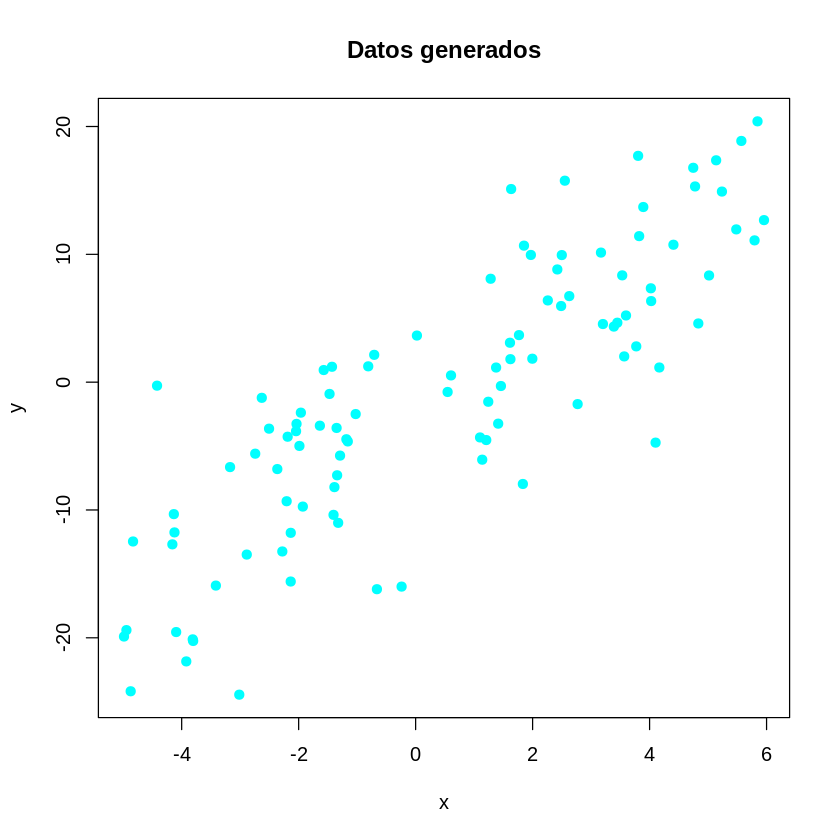

In [ ]:
plot(x1, y, main="Datos generados", col="cyan", pch = 19, xlab='x')

In [ ]:
minusll <- function(theta, y, x1) {
  media <- theta[1] + theta[2] * x1  # Se define la media
  desvi <- theta[3]                  # Se define la desviación.
  - sum(dnorm(x=y, mean=media, sd=desvi, log=TRUE))
}

In [ ]:
params <- optim(par=c(0, 0, 1), fn=minusll, method='L-BFGS-B',
              lower=c(-Inf, -Inf, 0), upper=c(Inf, Inf, Inf), 
              y=y, x1=x1)
params

$par
[1] -2.284990  2.866620  5.706902

$value
[1] 316.0615

$counts
function gradient 
      18       18 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

In [ ]:
data = data.frame(x1,y)
linear.model = lm(y ~ x1, data = data)
summary(linear.model)


Call:
lm(formula = y ~ x1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2059  -3.4736   0.4579   4.3708  14.6834 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.2850     0.5827  -3.921 0.000163 ***
x1            2.8666     0.1856  15.445  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.765 on 98 degrees of freedom
Multiple R-squared:  0.7088,	Adjusted R-squared:  0.7058 
F-statistic: 238.5 on 1 and 98 DF,  p-value: < 2.2e-16


In [ ]:
b0 = linear.model$coefficients[1]
b1 = linear.model$coefficients[2]

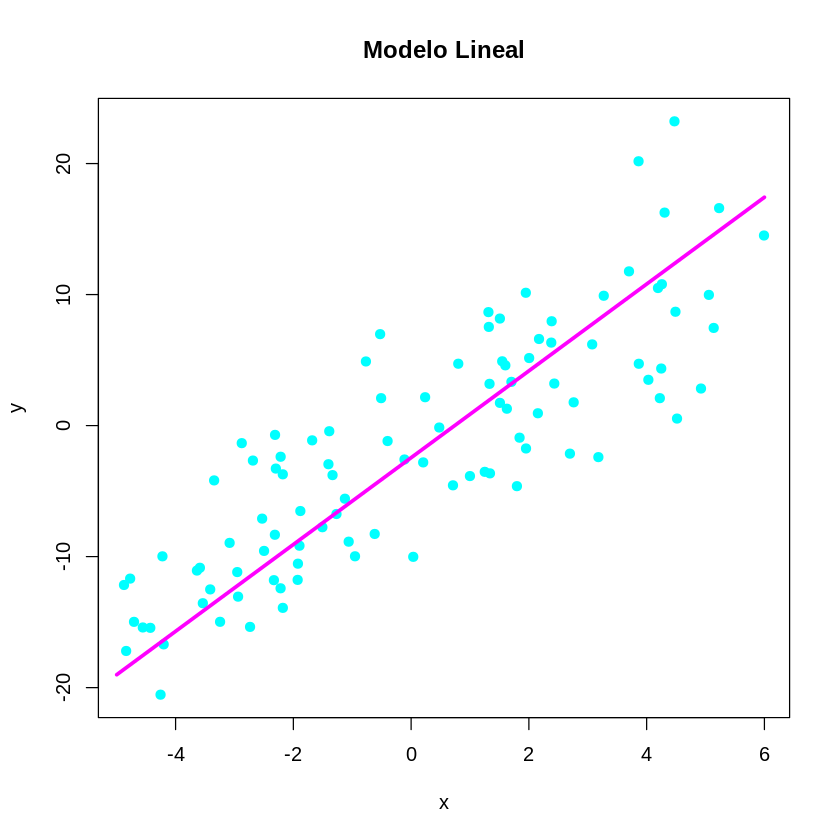

In [ ]:
xx = seq(-5,6,0.1)
yy = b0 + b1*xx
plot(x1,y, main="Modelo Lineal", xlab="x", col="cyan", pch=19)
lines(xx, yy, lw = 3, col="magenta")

### Ejemplo 2. Datos aplicación 

In [ ]:
datos <- read.csv(file= '/winequality-red.csv', sep=';')

In [ ]:
summary(datos)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [ ]:
cor(datos)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.00000000,-0.256130895,0.67170343,0.114776724,0.093705186,-0.153794193,-0.11318144,0.66804729,-0.68297819,0.183005664,-0.06166827,0.12405165
volatile.acidity,-0.25613089,1.000000000,-0.55249568,0.001917882,0.061297772,-0.010503827,0.07647000,0.02202623,0.23493729,-0.260986685,-0.20228803,-0.39055778
citric.acid,0.67170343,-0.552495685,1.00000000,0.143577162,0.203822914,-0.060978129,0.03553302,0.36494718,-0.54190414,0.312770044,0.10990325,0.22637251
residual.sugar,0.11477672,0.001917882,0.14357716,1.000000000,0.055609535,0.187048995,0.20302788,0.35528337,-0.08565242,0.005527121,0.04207544,0.01373164
chlorides,0.09370519,0.061297772,0.20382291,0.055609535,1.000000000,0.005562147,0.04740047,0.20063233,-0.26502613,0.371260481,-0.22114054,-0.12890656
free.sulfur.dioxide,-0.15379419,-0.010503827,-0.06097813,0.187048995,0.005562147,1.000000000,0.66766645,-0.02194583,0.07037750,0.051657572,-0.06940835,-0.05065606
total.sulfur.dioxide,-0.11318144,0.076470005,0.03553302,0.203027882,0.047400468,0.667666450,1.00000000,0.07126948,-0.06649456,0.042946836,-0.20565394,-0.18510029
density,0.66804729,0.022026232,0.36494718,0.355283371,0.200632327,-0.021945831,0.07126948,1.00000000,-0.34169933,0.148506412,-0.49617977,-0.17491923
pH,-0.68297819,0.234937294,-0.54190414,-0.085652422,-0.265026131,0.070377499,-0.06649456,-0.34169933,1.00000000,-0.196647602,0.20563251,-0.05773139
sulphates,0.18300566,-0.260986685,0.31277004,0.005527121,0.371260481,0.051657572,0.04294684,0.14850641,-0.19664760,1.000000000,0.09359475,0.25139708


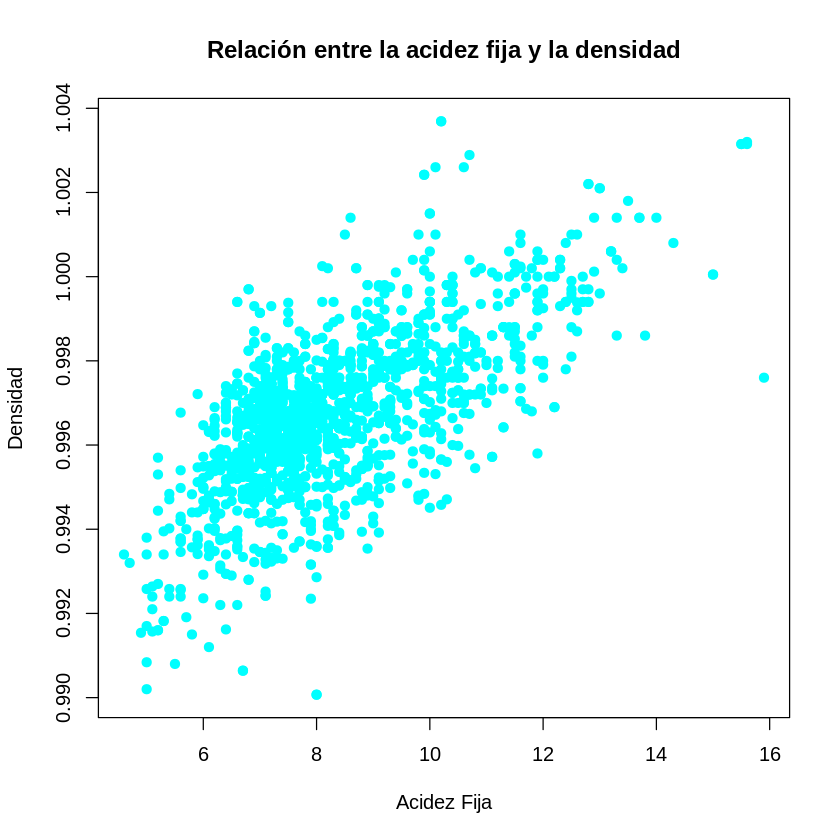

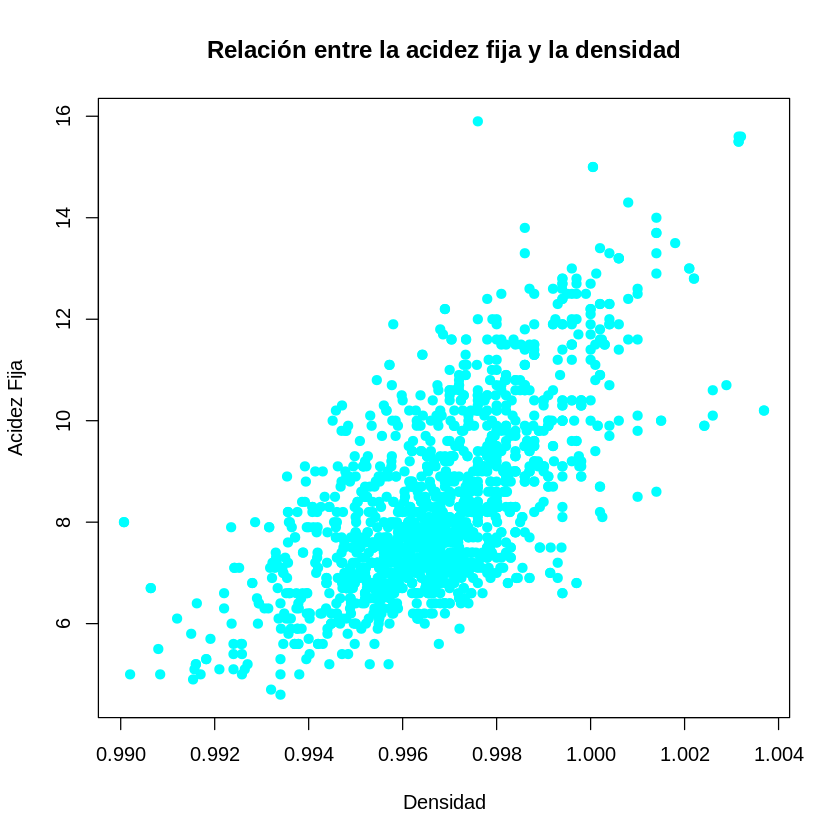

In [ ]:
densidad = datos$density 
acidez.fija = datos$fixed.acidity
plot(acidez.fija, densidad, xlab = "Acidez Fija", ylab="Densidad", 
      col="cyan", pch=19, main="Relación entre la acidez fija y la densidad")

plot( densidad, acidez.fija, xlab = "Densidad", ylab="Acidez Fija", 
      col="cyan", pch=19, main="Relación entre la acidez fija y la densidad")

In [ ]:
acidez.mean = mean(acidez.fija)
densidad.mean = mean(densidad)


In [ ]:
data = data.frame(x1,y)
linear.model = lm(y ~ x1, data = data)
summary(linear.model)



Call:
lm(formula = y ~ x1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2059  -3.4736   0.4579   4.3708  14.6834 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.2850     0.5827  -3.921 0.000163 ***
x1            2.8666     0.1856  15.445  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.765 on 98 degrees of freedom
Multiple R-squared:  0.7088,	Adjusted R-squared:  0.7058 
F-statistic: 238.5 on 1 and 98 DF,  p-value: < 2.2e-16


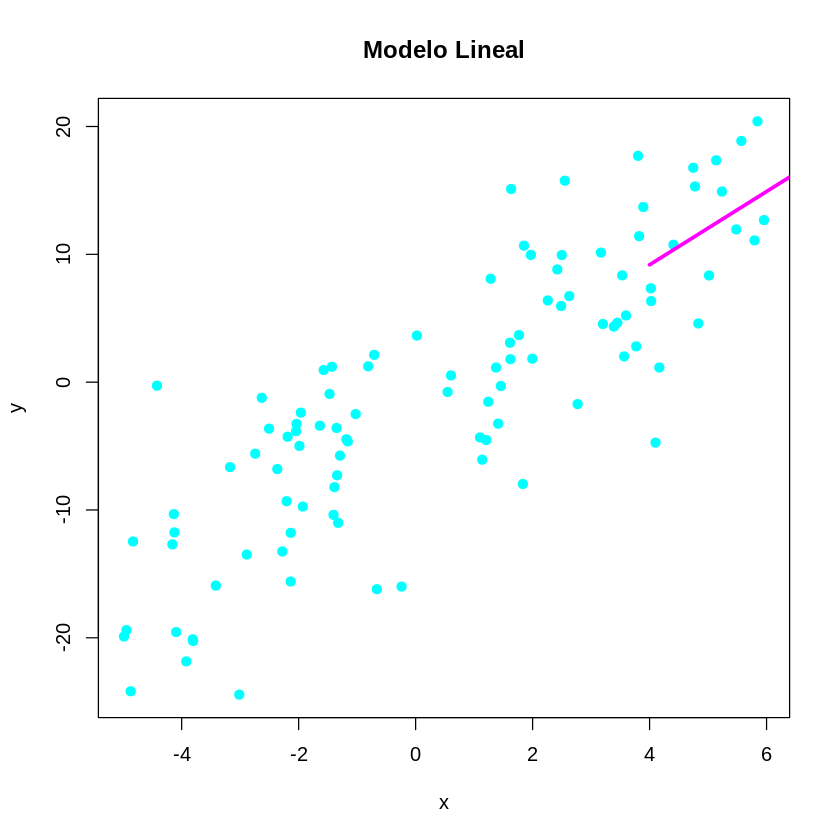

In [ ]:
b0 = linear.model$coefficients[1]
b1 = linear.model$coefficients[2]
xx = seq(4,16,0.1)
yy = b0 + b1*xx
plot(x1,y, main="Modelo Lineal", xlab="x", col="cyan", pch=19)
lines(xx, yy, lw = 3, col="magenta")